<a href="https://colab.research.google.com/github/Sarvesh1814/US-Book-Recommendation-System-/blob/main/Matrix_Factorisation_(SURPRISE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematics Behind Matrix Factorisation Model


---
* **Latent factor SVD**
---
\begin{equation}
\hat{r}_{ui} = \mu + b_u + b_i + \sum{f=1}^{k} (q_{if} + p_{uf})
\end{equation}

---
* **Optimization Problem**
---
\begin{equation}
\min_{b_u, b_i, q_i, p_u} \sum_{(u,i) \in R_{train}} (r_{ui} - \hat{r}_{ui})^2 + \lambda (||q_i||^2 + ||p_u||^2 + ||b_u||^2 + ||b_i||^2)
\end{equation}

---
* **Gradient Descent**
---

\begin{equation}
\frac{\partial}{\partial b_u} = -2 (r_{ui} - \hat{r}_{ui}) + 2 \lambda b_u
\end{equation}

\begin{equation}
\frac{\partial}{\partial b_i} = -2 (r_{ui} - \hat{r}_{ui}) + 2 \lambda b_i
\end{equation}

\begin{equation}
\frac{\partial}{\partial p_{uf}} = -2 (r_{ui} - \hat{r}{ui}) q{if} + 2 \lambda p_{uf}
\end{equation}

\begin{equation}
\frac{\partial}{\partial q_{if}} = -2 (r_{ui} - \hat{r}{ui}) p{uf} + 2 \lambda q_{if}
\end{equation}

---
* **Update Rule**
---


\begin{aligned}
b_{u}^{(k+1)} &= b_{u}^{(k)} + \gamma \cdot \left( \sum_{i \in I_u} (r_{ui} - \mu - b_u^{(k)} - b_i^{(k)}) - \lambda b_u^{(k)} \right) \\
b_{i}^{(k+1)} &= b_{i}^{(k)} + \gamma \cdot \left( \sum_{u \in U_i} (r_{ui} - \mu - b_u^{(k)} - b_i^{(k)}) - \lambda b_i^{(k)} \right)
\end{aligned}

\begin{equation}
p_{uk}^{(t+1)} = p_{uk}^{(t)} - \gamma \cdot \frac{\partial}{\partial p_{uk}} J(p_{uk}^{(t)}, q_{ik}^{(t)}, b_u^{(t)}, b_i^{(t)})
\end{equation}

\begin{equation}
q_{ik}^{(t+1)} = q_{ik}^{(t)} - \gamma \cdot \frac{\partial}{\partial q_{ik}} J(p_{uk}^{(t)}, q_{ik}^{(t)}, b_u^{(t)}, b_i^{(t)})
\end{equation}

# Installing and Importing Libraires

In [ ]:
!pip install surprise


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095440 sha256=aad72f9b6ecd007cbe48a011aab7a54f70153c213c9d042d9f39257281030b6c
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader
import numpy as np
import pandas as pd
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from surprise import dump
import matplotlib.pyplot as plt

# Dataset Preparation

In [ ]:
Base = "/content/drive/MyDrive/RS Data/Assignment 3/Processed_data/"
train=pd.read_csv(Base+"Train_df_final.csv")
test = pd.read_csv(Base+"Test_df_final.csv")

In [ ]:
train = train[["User-ID"	,"ISBN",	"Book-Rating"	,"book_name"]]
test = test[["User-ID"	,"ISBN",	"Book-Rating"	,"book_name"]]

In [ ]:
train.head()

,User-ID,ISBN,Book-Rating,book_name
0,68436,0345323440,8,Footfall
1,216829,0375707972,5,The Reader
2,153718,0373484887,7,Hidden Star (The Star Series)
3,62862,0140244824,5,Songs in Ordinary Time (Oprah's Book Club (Pap...
4,17003,0312305060,10,The Hours: A Novel


# Collaborative System Using Matrix Factorisation

In [ ]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(train[['User-ID', 'ISBN', 'Book-Rating']], reader)
trainset = data.build_full_trainset()


In [ ]:
trainset, valset = train_test_split(data, test_size=0.2)
algo = SVD(n_factors=10000, reg_all=0.1)
cv_results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)
trainset = data.build_full_trainset()
algo.fit(trainset)
predictions = algo.test(valset)
print("RMSE:", accuracy.rmse(predictions))
print("MAE:", accuracy.mae(predictions))

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.8505  1.8282  1.8179  1.8481  1.8066  1.8303  0.0170  
Fit time          97.54   83.41   110.46  89.40   100.87  96.34   9.34    
Test time         0.42    0.52    0.46    0.67    0.60    0.54    0.09    
RMSE: 0.1094
RMSE: 0.1093665551834273
MAE:  0.0497
MAE: 0.049743711744872486


# Evaluation

In [ ]:
true = test[test['Book-Rating'] == 10]
true = true[true['User-ID'].isin(list(train["User-ID"]))]

In [ ]:
true

,User-ID,ISBN,Book-Rating,book_name
9,31315,051513452X,10,The Lunatic Cafe (Anita Blake Vampire Hunter (...
15,16634,0452261341,10,"Gunslinger Tower 1 (Dark Tower, No 1)"
18,46003,1583224890,10,9-11
19,46398,0517542099,10,The Hitchhiker's Guide to the Galaxy
30,83287,0553563521,10,Devil's Waltz (Alex Delaware Novels (Paperback))
...,...,...,...,...
24049,116122,0345434684,10,The Skies Of Pern
24055,198781,0060961325,10,The Celluloid Closet: Homosexuality in the Movies
24056,219259,0767915054,10,A Girl Named Zippy: Growing Up Small in Moorel...
24062,145449,0316107255,10,Penguin Dreams and Stranger Things (A Bloom Co...


In [ ]:
len(set(true["User-ID"])) # Unique Users in Testset

2169

## Precision @ K

In [ ]:
def precision(true,k,user):
  final = true[true['User-ID'] == user]
  user_id = user  
  uid = trainset.to_inner_uid(user_id)
  all_items = trainset.all_items()
  x = trainset.ur[int(uid)]
  a = [x[i][0] for i in range(len(x))]
  not_rated_items = [item for item in all_items if item not in a]
  predictions = []
  for iid in not_rated_items:
      pred = algo.predict(uid, trainset.to_raw_iid(iid))
      predictions.append((iid, pred.est))
  predictions_sorted = sorted(predictions, key=lambda x: x[1], reverse=True)[:k]
  lst =()
  for item, rating in predictions_sorted:
      lst+= ((trainset.to_raw_iid(item),rating),)
  dx = pd.DataFrame(lst,columns=["book_name","Predicted Rating"])

  common_items = final['book_name'].isin(dx['book_name'])
  num = common_items.sum()
  num1=num/k
  return num ,num1

In [ ]:
def precision_at_k(true,k):
  pre = 0
  users = list(true["User-ID"])
  for user in users:
    temp,temp1=precision(true,k,user)
    pre+=temp1
    
  return pre/len(users) , temp



In [ ]:
p_5,t_5=precision_at_k(true,5)
p_5

0.023640897755611116

In [ ]:
p_10,t_10=precision_at_k(true,10)
p_10

0.014788029925187149

In [ ]:
p_100,t_100=precision_at_k(true,100)
p_100

0.004448877805486262

In [ ]:
p_1000,t_1000=precision_at_k(true,1000)
p_1000

0.0014635910224438848

In [ ]:
p_2500,t_2500=precision_at_k(true,2500)
p_2500

0.0009404488778054549

In [ ]:
p_5000,t_5000=precision_at_k(true,5000)
p_5000

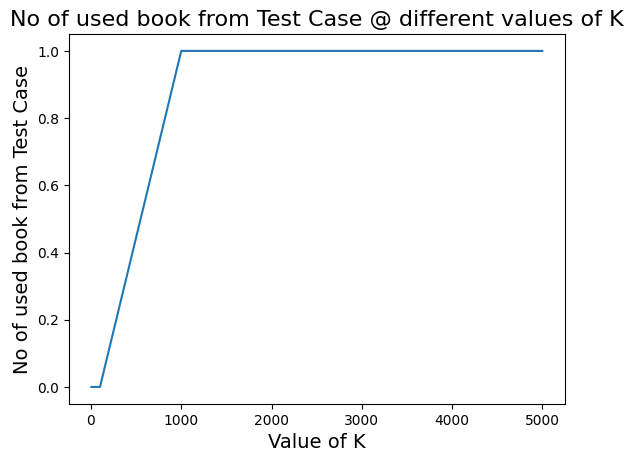

In [ ]:
K = [5, 10, 100, 1000, 2500,5000]
t_K = [t_5,t_10, t_100, t_1000, t_2500,t_5000]

fig, ax = plt.subplots()
ax.plot(K, t_K)
ax.set_xlabel('Value of K', fontsize=14)
ax.set_ylabel('No of used book from Test Case', fontsize=14)
ax.set_title('No of used book from Test Case @ different values of K', fontsize=16)
plt.show()


In [ ]:
K = [5, 10, 100, 1000, 2500,5000]
P_K = [p_5,p_10, p_100, p_1000, p_2500,p_5000]

fig, ax = plt.subplots()
ax.plot(K, P_K)
ax.set_xlabel('Value of K', fontsize=14)
ax.set_ylabel('Precision @ K', fontsize=14)
ax.set_title('Precision @ different values of K', fontsize=16)
plt.show()


# Recommendation System

In [ ]:
def MF_RS():
  k = int(input("Value of K for top-K Recommendations: "))
  user_id = int(input("Enter User-ID: "))  
  uid = trainset.to_inner_uid(user_id)
  all_items = trainset.all_items()
  x = trainset.ur[int(uid)]
  a = [x[i][0] for i in range(len(x))]
  not_rated_items = [item for item in all_items if item not in a]
  predictions = []
  for iid in not_rated_items:
      pred = algo.predict(uid, trainset.to_raw_iid(iid))
      predictions.append((iid, pred.est))
  predictions_sorted = sorted(predictions, key=lambda x: x[1], reverse=True)[:k]
  print("\n")
  print(f"Top {k} Book recommendations for User {user_id} are: ")
  lst =()
  for item, rating in predictions_sorted:
      lst+= ((trainset.to_raw_iid(item),rating),)
  dx = pd.DataFrame(lst,columns=["Book Name","Predicted Rating"])
  
  display(dx)
  return dx

In [ ]:
dx = MF_RS()

Value of K for top-K Recommendations: 5
Enter User-ID: 46398


Top 5 Book recommendations for User 46398 are: 


,Book Name,Predicted Rating
0,059035342X,8.527599
1,043935806X,8.434885
2,0439139597,8.406533
3,0446310786,8.369887
4,0439136350,8.299950


In [ ]:
MF_RS()

Value of K for top-K Recommendations: 5
Enter User-ID: 2033


Top 5 Book recommendations for User 2033 are: 


,Book Name,Predicted Rating
0,Harry Potter and the Goblet of Fire (Book 4),8.592347
1,Harry Potter and the Sorcerer's Stone (Harry P...,8.514908
2,To Kill a Mockingbird,8.445719
3,Harry Potter and the Chamber of Secrets (Book 2),8.445549
4,"The Two Towers (The Lord of the Rings, Part 2)",8.344572


In [ ]:
dump.dump('/content/drive/MyDrive/RS Data/Assignment 3/Processed_data/Matrix_Factorisation.pkl', algo=algo)

### **Original Movies from test set**

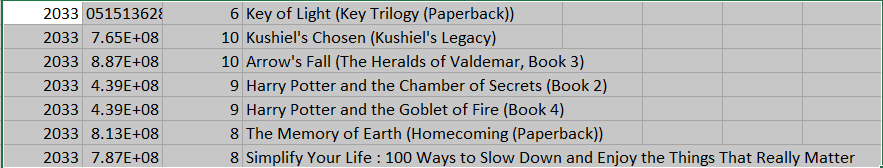